In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [3]:
def import_everything(loc):
    df = pd.read_csv(loc)
    df['origin_time'] = df.origin_time.apply(pd.to_datetime)
    df.sort_values(by='origin_time', inplace=True)
    df['t'] = df.origin_time.diff().apply(lambda t: t.total_seconds()).fillna(0)
    df['ct'] = df['t'].cumsum()
    n_total = df.shape[0]
    df = df[df.depth.between(140, 410)].copy()
    print(f'events removed outside of depth 140 to 410m: total:{n_total}; total removed:{n_total - df.shape[0]}; percent:{(n_total - df.shape[0])/n_total}')
    return df

events removed outside of depth 140 to 410m: total:586; total removed:40; percent:0.06825938566552901


<Axes: >

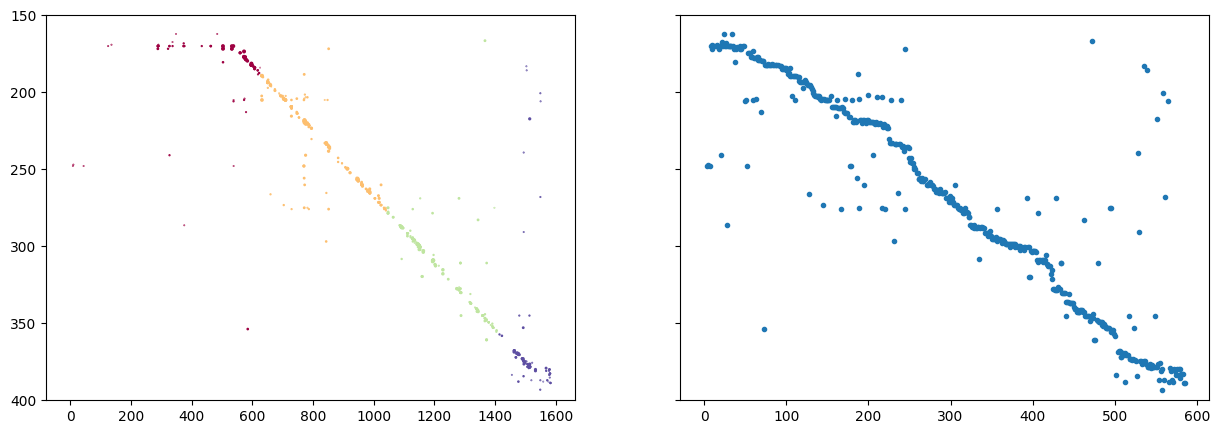

In [4]:
df211 = import_everything('211everything.csv')

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax[0].scatter(df211.ct, df211.depth, marker='.', c=df211.phone_number, cmap='Spectral', s=df211.max_amp)
ax[0].set_ylim(400, 150)
df211.depth.plot(linestyle='', marker='.', ax=ax[1])


events removed outside of depth 140 to 410m: total:1216; total removed:49; percent:0.04029605263157895


<Axes: >

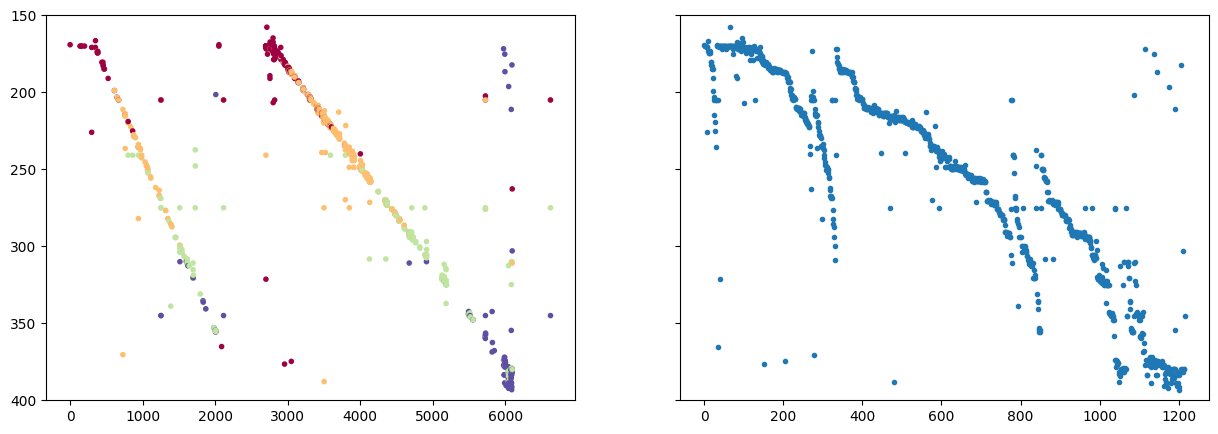

In [5]:
df197 = import_everything('197everything.csv')

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax[0].scatter(df197.ct, df197.depth, marker='.', c=df197.phone_number, cmap='Spectral')
ax[0].set_ylim(400, 150)
df197.depth.plot(linestyle='', marker='.', ax=ax[1])


events removed outside of depth 140 to 410m: total:4009; total removed:373; percent:0.09304065851833375


<Axes: >

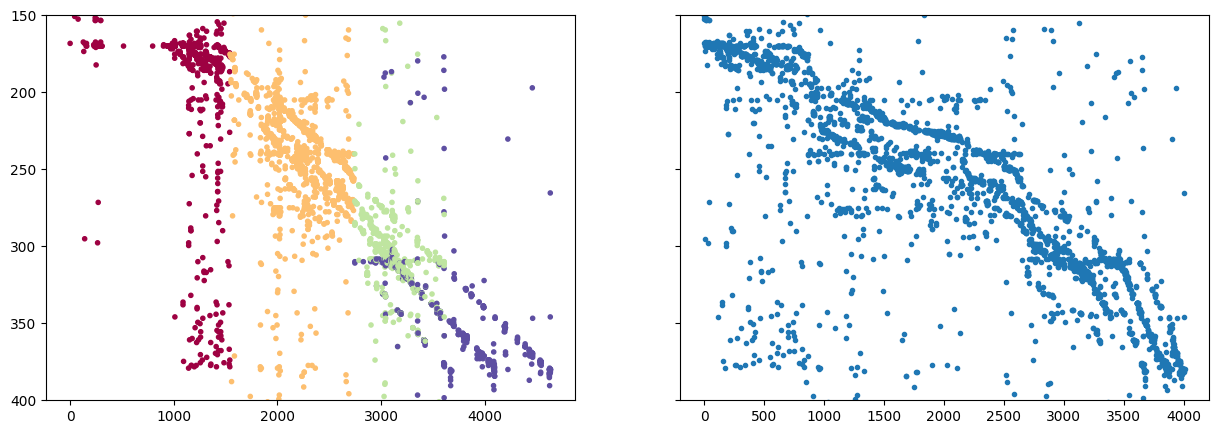

In [6]:
df188 = import_everything('188everything.csv')

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax[0].scatter(df188.ct, df188.depth, marker='.', c=df188.phone_number, cmap='Spectral')
ax[0].set_ylim(400, 150)
df188.depth.plot(linestyle='', marker='.', ax=ax[1])


events removed outside of depth 140 to 410m: total:2954; total removed:101; percent:0.03419092755585647


<Axes: >

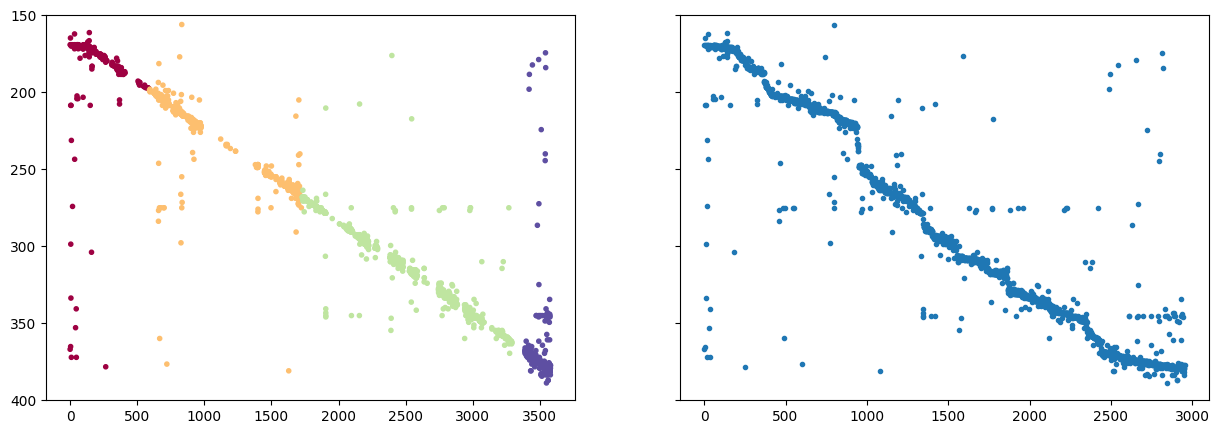

In [7]:
df141 = import_everything('141everything.csv')

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax[0].scatter(df141.ct, df141.depth, marker='.', c=df141.phone_number, cmap='Spectral')
ax[0].set_ylim(400, 150)
df141.depth.plot(linestyle='', marker='.', ax=ax[1])

In [8]:
# df188['dt'] = np.abs(df188.t1 - df188.t2)
# df188 = df188[df188.dt < 0.4].copy()
# df188.shape

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            WLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.516e+04
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:05:54   Log-Likelihood:                -13646.
No. Observations:                2853   AIC:                         2.730e+04
Df Residuals:                    2851   BIC:                         2.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.8355      0.759    227.608      0.0

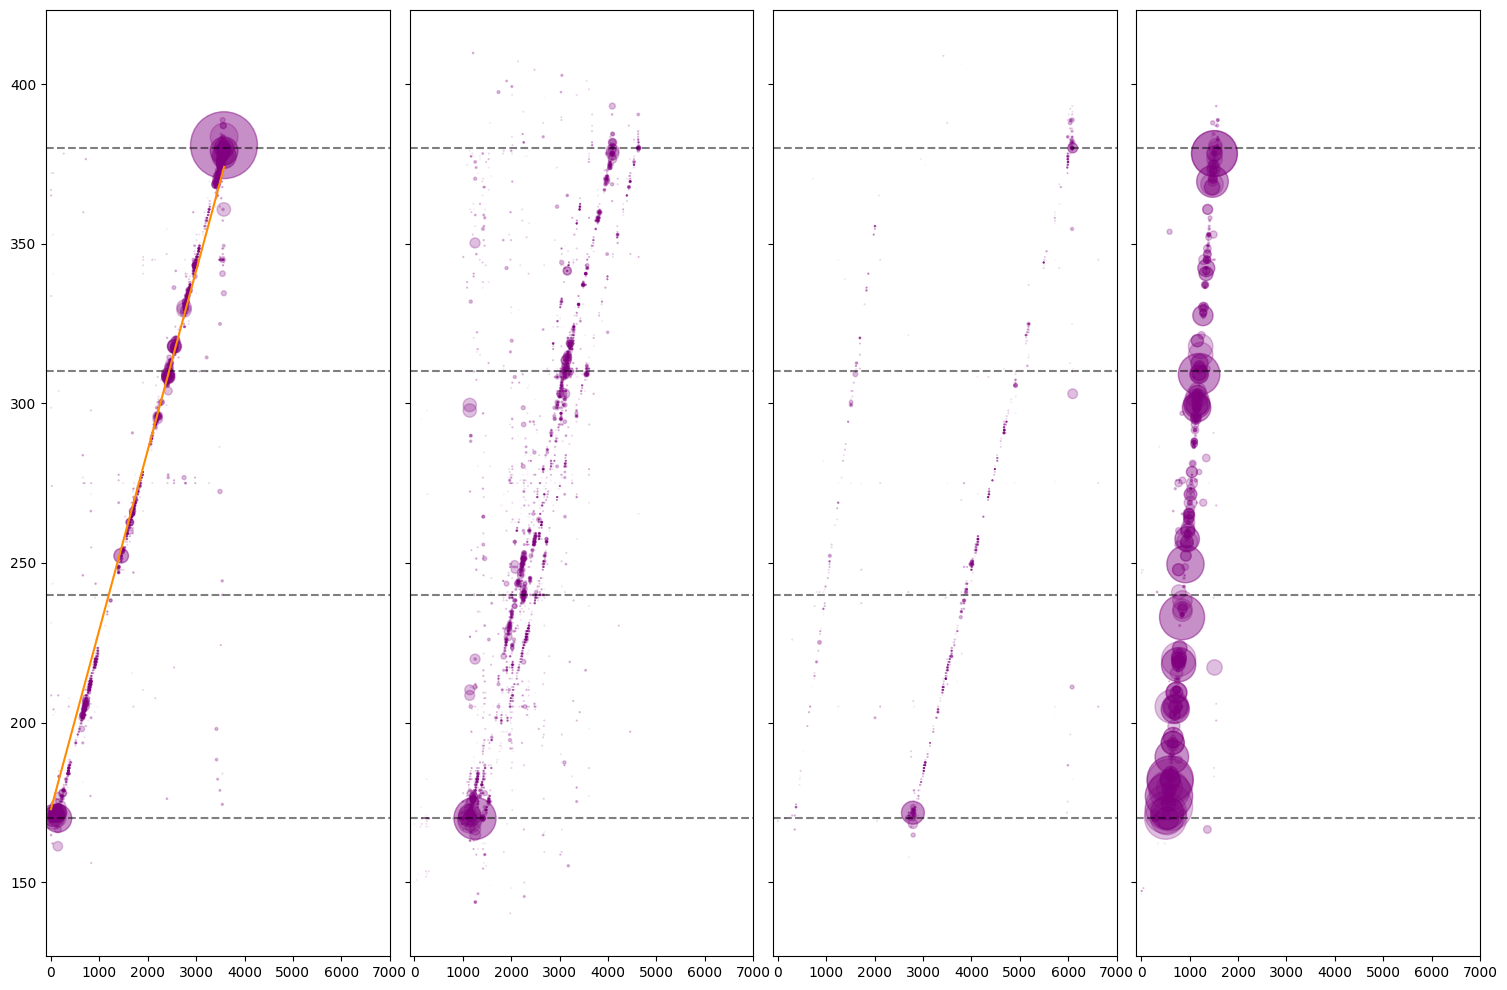

In [61]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1, 4, figsize=(15, 10), sharey=True, sharex=True)
# ax[0].set_ylim(400, 150)
ax[0].set_xlim(-100, 7000)

for a in ax:
    a.plot((-100, 10000), (170, 170), linestyle='--', color='black', alpha=0.5)
    a.plot((-100, 10000), (240, 240), linestyle='--', color='black', alpha=0.5)
    a.plot((-100, 10000), (310, 310), linestyle='--', color='black', alpha=0.5)
    a.plot((-100, 10000), (380, 380), linestyle='--', color='black', alpha=0.5)

ax[0].scatter(df141.ct, df141.depth, marker='.', c='purple', s=df141.max_amp**3.2, alpha=0.25)
ax[1].scatter(df188.ct, df188.depth, marker='.', c='purple', s=df188.max_amp**3.2, alpha=0.25)
ax[2].scatter(df197.ct, df197.depth, marker='.', c='purple', s=df197.max_amp**3.2, alpha=0.25)
ax[3].scatter(df211.ct, df211.depth, marker='.', c='purple', s=df211.max_amp**3.2, alpha=0.25)

def wls_fit(df):
    y = df.depth.values
    X = df.ct.values

y = df141.depth.values
X = df141.ct.values
X = sm.add_constant(X)
w = df141.max_amp
# w = np.ones_like(w)

# mod_wls = sm.WLS(y, X, weights=1.0 / (w ** 2))
mod_wls = sm.WLS(y, X, weights=1.0 / (w ** 2), hasconst=True)
res_wls = mod_wls.fit()
print(res_wls.summary())
predy = res_wls.get_prediction().summary_frame()['mean'].values

ax[0].plot(X[:,1], predy, color='darkorange')
# cbar_ax = fig.add_axes([0.95, 0.15, 0.005, 0.7])
# fig.colorbar(cbar, cax=cbar_ax, label='Maximum Amplitude (Pa)')

fig.tight_layout()

<Axes: xlabel='ct', ylabel='depth'>

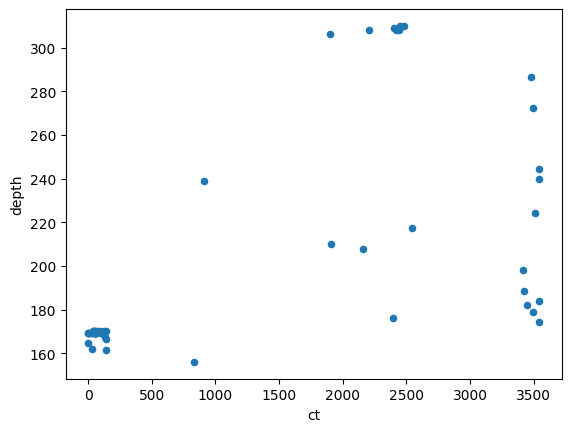

In [68]:
df141[df141.relative_depth < 0].plot.scatter('ct', 'depth')

In [56]:
res_wls.get_prediction().summary_frame()['mean'].values

array([172.83550349, 172.91595936, 172.92040102, ..., 374.03405659,
       374.07248537, 374.07743304])

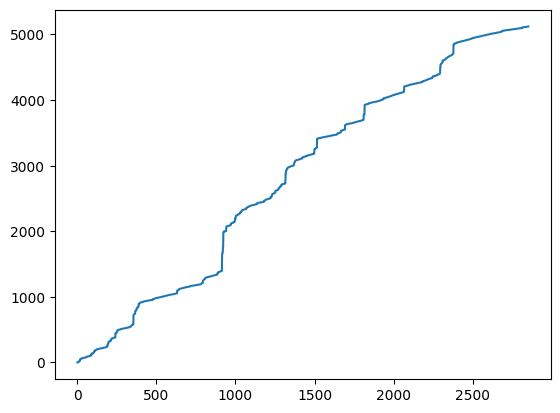

In [38]:
# mod_wls.predict(X.reshape(-1, 1))
# 
plt.plot(mod_wls.predict(X.reshape(-1, 1).transpose())[:,1])

In [11]:
df141.to_csv('depths141.csv', )
df188.to_csv('depths188.csv', )
df197.to_csv('depths197.csv', )
df211.to_csv('depths211.csv', )


In [12]:
df141.columns

Index(['Unnamed: 0', 'id', 'datetime', 'obs_dt', 'phone_number',
       'arrival_hydrophone', 'relative_depth', 'depth', 'max_amp',
       'second_hydrophone', 't1', 't2', 'origin_time', 't', 'ct'],
      dtype='object')

In [13]:
df141['t+t1'] = (df141['t'] - df141.shift(1)['t']).fillna(0)
df141['t-t1'] = (df141['t'] - df141.shift(-1)['t']).fillna(0)

In [14]:
df141[['depth','t','max_amp', 't+t1', 't-t1']].corr()

,depth,t,max_amp,t+t1,t-t1
depth,1.000000,-0.030759,0.111070,-0.001233,0.000904
t,-0.030759,1.000000,-0.075260,0.664751,0.664752
max_amp,0.111070,-0.075260,1.000000,-0.015371,0.001420
t+t1,-0.001233,0.664751,-0.015371,1.000000,0.485264
t-t1,0.000904,0.664752,0.001420,0.485264,1.000000


(-1.0, 1.0)

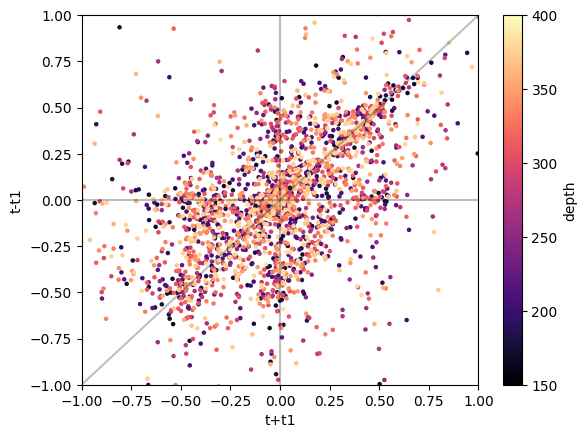

In [15]:
ax = df141.plot.scatter('t+t1', 't-t1', c='depth', vmin=150, vmax=400, cmap='magma', marker='.',)
ax.plot((0, 0), (-200, 200)     , alpha=0.25, color='black',)
ax.plot((-200, 200), (0, 0)     , alpha=0.25, color='black',)
ax.plot((-200, 200), (-200, 200), alpha=0.25, color='black',)
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)

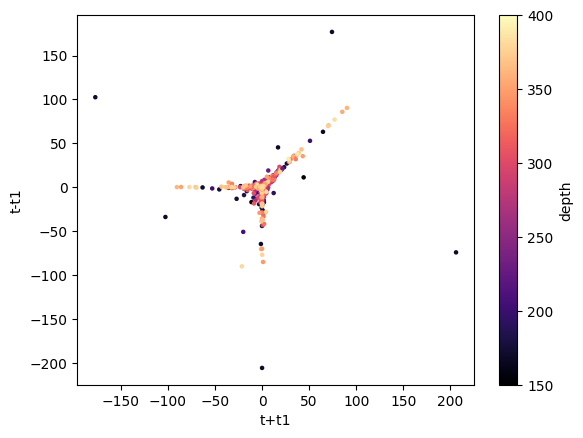

In [16]:
df188['t+t1'] = (df188['t'] - df188.shift(1)['t']).fillna(0)
df188['t-t1'] = (df188['t'] - df188.shift(-1)['t']).fillna(0)
ax = df188.plot.scatter('t+t1', 't-t1', c='depth', vmin=150, vmax=400, cmap='magma', marker='.',)


In [17]:
test = pd.DataFrame({'data':[2, 5, 4, 5, 3, 2, 6, 11, 2, 4]})
test['test.diff()'] = test.diff()
test['test.data.diff().fillna(test.data)'] = test.data.diff().fillna(test.data)
test['test.shift(-1).data.diff()'] = test.shift(-1).data.diff()
test

,data,test.diff(),test.data.diff().fillna(test.data),test.shift(-1).data.diff()
0,2,NaN,2.0,NaN
1,5,3.0,3.0,-1.0
2,4,-1.0,-1.0,1.0
3,5,1.0,1.0,-2.0
4,3,-2.0,-2.0,-1.0
5,2,-1.0,-1.0,4.0
6,6,4.0,4.0,5.0
7,11,5.0,5.0,-9.0
8,2,-9.0,-9.0,2.0
9,4,2.0,2.0,NaN


In [18]:
test.data - test.shift(1).data

0    NaN
1    3.0
2   -1.0
3    1.0
4   -2.0
5   -1.0
6    4.0
7    5.0
8   -9.0
9    2.0
Name: data, dtype: float64

In [19]:
test.data - test.shift(-1).data

0   -3.0
1    1.0
2   -1.0
3    2.0
4    1.0
5   -4.0
6   -5.0
7    9.0
8   -2.0
9    NaN
Name: data, dtype: float64

In [20]:
df141[df141.depth > 400]

,Unnamed: 0,id,datetime,obs_dt,phone_number,arrival_hydrophone,relative_depth,depth,max_amp,second_hydrophone,t1,t2,origin_time,t,ct,t+t1,t-t1


In [21]:
df141[df141.dt < -0.04].depth.hist()

AttributeError: 'DataFrame' object has no attribute 'dt'